<a href="https://colab.research.google.com/github/Sreraj/NLP-Projects/blob/main/SMS_Spam_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TASK 3 : SPAM SMS DETECTION***

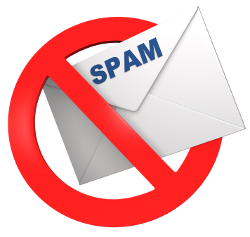

In [ ]:
from IPython.display import Image,display
display(Image("/content/stop-spam.png" , width=700 ,height = 400))

# **Import Neccessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# NLP
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("stopwords")
nltk.download("punkt_tab")

# Models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
# Load data
df = pd.read_csv("/content/spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
# Top 5 rows
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# Bottom 5 rows
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
# Check null values

df.isna().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
# Dropping unwanted columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# Rename columns

df.rename(columns = {'v1':"Target",'v2':'Text'},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.dtypes

,0
Target,object
Text,object


In [ ]:
df.shape

(5572, 2)

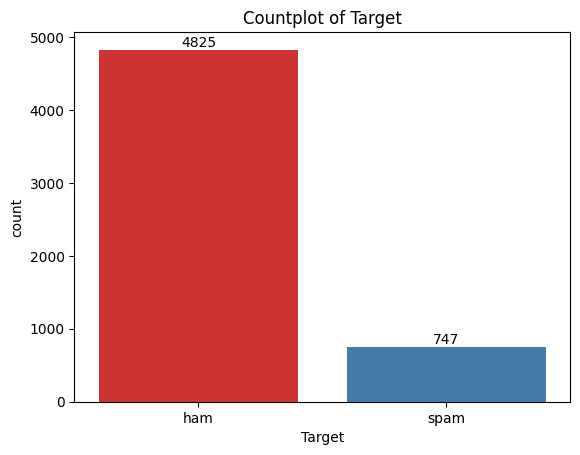

In [ ]:
# Countplot for target

ax = sns.countplot(x='Target',data=df,palette='Set1')
for i in ax.containers:
  ax.bar_label(i)
plt.title("Countplot of Target")
plt.show()

In [ ]:
# Converting Categorical into numerical value

df['Target'] = df['Target'].replace({'spam':1,'ham':0})
df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
text = df['Text']
y = df['Target']


In [ ]:
# Tokenization

tk = TweetTokenizer()

text = text.apply(lambda x: ' '.join(tk.tokenize(x)))
text

,Text
0,"Go until jurong point , crazy .. Available onl..."
1,Ok lar ... Joking wif u oni ...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor ... U c already then sa...
4,"Nah I don't think he goes to usf , he lives ar..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home ?
5569,"Pity , * was in mood for that . So ... any oth..."
5570,The guy did some bitching but I acted like i'd...


In [ ]:
# Remove Special characters

text = text.str.replace("[^a-zA-Z0-9]"," ",regex=True)
text

,Text
0,Go until jurong point crazy Available onl...
1,Ok lar Joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor U c already then sa...
4,Nah I don t think he goes to usf he lives ar...
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will b going to esplanade fr home
5569,Pity was in mood for that So any oth...
5570,The guy did some bitching but I acted like i d...


In [ ]:
# Stemming

ss = SnowballStemmer(language='english')
text = text.apply(lambda x: " ".join([ss.stem(i.lower()) for i in tk.tokenize(x)]))
text

,Text
0,go until jurong point crazi avail onli in bugi...
1,ok lar joke wif u oni
2,free entri in 2 a wkli comp to win fa cup fina...
3,u dun say so earli hor u c alreadi then say
4,nah i don t think he goe to usf he live around...
...,...
5567,this is the 2nd time we have tri 2 contact u u...
5568,will b go to esplanad fr home
5569,piti was in mood for that so ani other suggest
5570,the guy did some bitch but i act like i d be i...


In [ ]:
# Remove Stopwords

stop = stopwords.words("english")

text = text.apply(lambda x:" ".join([i for i in tk.tokenize(x) if i not in stop]))
text

,Text
0,go jurong point crazi avail onli bugi n great ...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkts 2...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,b go esplanad fr home
5569,piti mood ani suggest
5570,guy bitch act like interest buy someth els nex...


In [ ]:
# Vectorization

vec = TfidfVectorizer()

data = vec.fit_transform(text)
data

<5572x7088 sparse matrix of type '<class 'numpy.float64'>'
	with 46997 stored elements in Compressed Sparse Row format>

In [ ]:
# Shape of data
data.shape

(5572, 7088)

In [ ]:
# Input and Output

x = data
y = df["Target"]

In [ ]:
# Balancing data due to imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x,y = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

,count
Target,
0,4825
1,4825


In [ ]:
# Train-Test Split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# Model Creation

nb = MultinomialNB()
lr = LogisticRegression()
sv =SVC()

model = [nb,lr,sv]
r=[]

for i in model:
  print("Model is :",i)
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  print("Accuracy :",accuracy_score(y_test,y_pred))
  r.append(accuracy_score(y_test,y_pred))
  print("Confusion matrix :",confusion_matrix(y_test,y_pred))
  print("Classification Report :",classification_report(y_test,y_pred))

Model is : MultinomialNB()
Accuracy : 0.9841105354058722
Confusion matrix : [[1416   38]
 [   8 1433]]
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1454
           1       0.97      0.99      0.98      1441

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895

Model is : LogisticRegression()
Accuracy : 0.9848013816925734
Confusion matrix : [[1441   13]
 [  31 1410]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1454
           1       0.99      0.98      0.98      1441

    accuracy                           0.98      2895
   macro avg       0.98      0.98      0.98      2895
weighted avg       0.98      0.98      0.98      2895

Model is : SVC()
Accuracy : 0.9951640759930915
Confusion matrix : [[1453    1]
 [  13 1

In [ ]:
Model = pd.DataFrame({'Algorithm':['Naive Bayes','Logistic Regression','Support Vector Machine'],'Accuracy': [f"{acc * 100:.2f}%" for acc in r]})
Model

,Algorithm,Accuracy
0,Naive Bayes,98.41%
1,Logistic Regression,98.48%
2,Support Vector Machine,99.52%


In [ ]:
# Checking
input_message = ["Congratulations! You've won a prize. Click the link to claim."]
input_message_tfidf = vec.transform(input_message)

# Predict using the SVM model
y_new = sv.predict(input_message_tfidf)
result = "spam" if y_new[0] == 1 else "ham"
print(result)

spam
